In [37]:
url = "https://raw.githubusercontent.com/sinhvienfpt/Boston_House_Prices/main/data/housing_comma.csv"

## Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data exploring

In [39]:
df = pd.read_csv(url)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


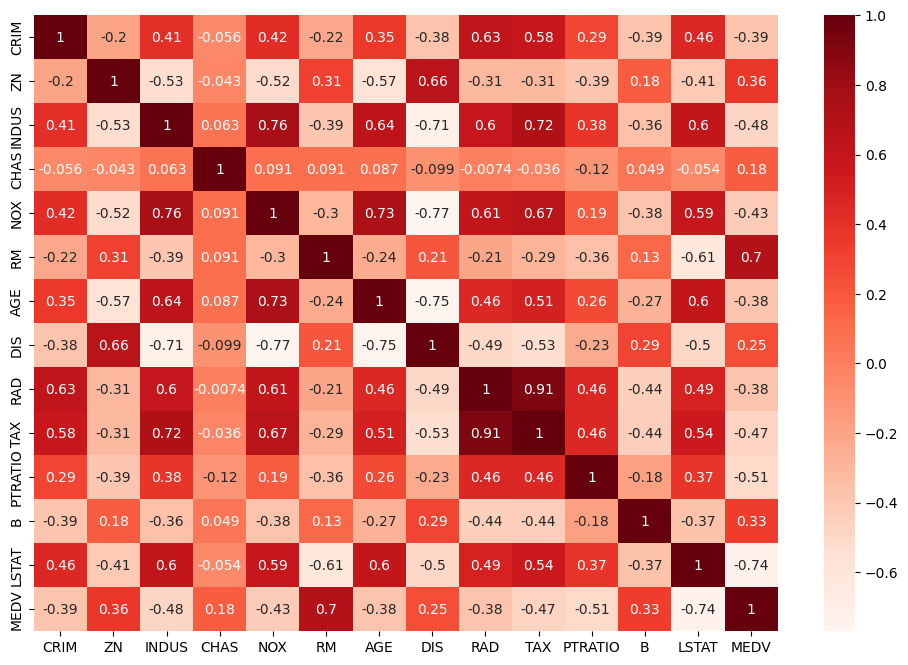

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

In [41]:
# Sort abs correlation values with respect to MEDV
df.corr()['MEDV'].apply('abs').sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

The 3 most important features that impact on MEDV are:

|Feature|Cor with MEDV| Meaning|
|---|---|---|
|LSTAT| 0.737663|% lower status of the population|
|RM|0.695360|average number of rooms per dwelling|
|PTRATIO|0.507787|pupil-teacher ratio by town|

But other characteristics also have significant effects on MEDV. (Min of corr >0.17)

## Define features

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X,y = df.drop('MEDV', axis=1), df['MEDV']

In [44]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [45]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Predict

In [47]:
#Import all regressors models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
#Create a dictionary with all regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

In [49]:
res = {
    'Model': [],
    'MSE': [],
    'R2': []
}

# Train all regressor and save it to res
for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    res['Model'].append(name)
    res['MSE'].append(mean_squared_error(y_test, y_pred))
    res['R2'].append(r2_score(y_test, y_pred))


## Evaluate

In [36]:
resdf = pd.DataFrame(res)

In [50]:
resdf

,Model,MSE,R2
0,Linear Regression,33.448980,0.589222
1,Ridge,34.231606,0.579611
2,Lasso,41.700097,0.487893
3,Elastic Net,40.665332,0.500600
4,Random Forest,19.870052,0.755981
5,Gradient Boosting,16.855539,0.793002
6,SVM,78.478054,0.036233
7,Decision Tree,34.216373,0.579798
8,KNN,51.743875,0.364548


In [ ]:
resdf.to_csv('result.csv', index=False)

## Create model
So we choose Gradient Boosting for the last model of this problem.

In [51]:
best_model = regressors['Gradient Boosting']

best_model.fit(X,y)

GradientBoostingRegressor()

In [52]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)